# STAT 681 - Lecture on neural networks

#### Course: STAT 681
#### Semester: Fall 2018
#### Lecture Time: 10/29/2018 12:30 PM, Dusable 274
#### ZID: Z1835018
#### Author: Akhil Pandey

### 1. Import the libraries

In [50]:
from __future__ import print_function

import io
import sys
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.image as img
import matplotlib.pyplot as plt
from collections import Counter
from keras.models import Sequential
from collections import defaultdict
from matplotlib.pyplot import figure
from keras.optimizers import RMSprop
from keras.callbacks import LambdaCallback
from keras.utils.data_utils import get_file
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

### 2. Simulation of a dataset

$$
Y = f(X) + \epsilon
$$

In [95]:
x = np.arange(0.0, 1, 0.01).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

#### 2.1 Visualize the response vector on a histogram

/Users/akhil/.pyenv/versions/jupyter/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


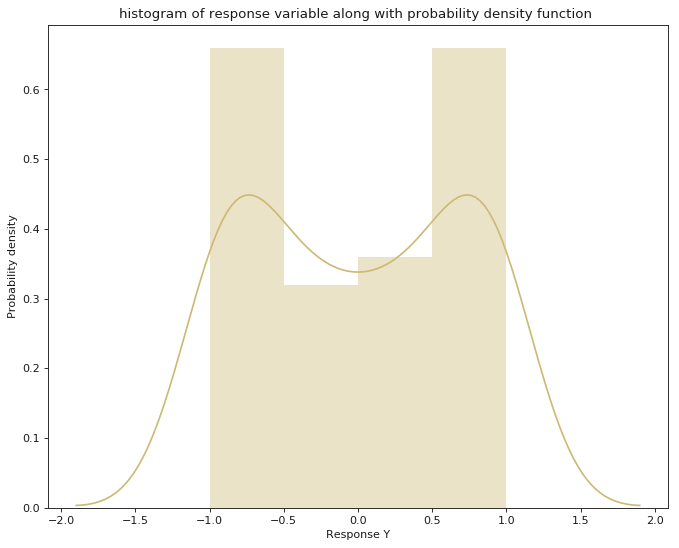

In [96]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# plot the histogram
sns.set_color_codes()
sns.distplot(y, color='y')
plt.title("histogram of response variable along with probability density function ")
plt.xlabel('Response Y')
plt.ylabel('Probability density')
plt.show()

#### 2.2 Visualize the feature vector on a histogram

/Users/akhil/.pyenv/versions/jupyter/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


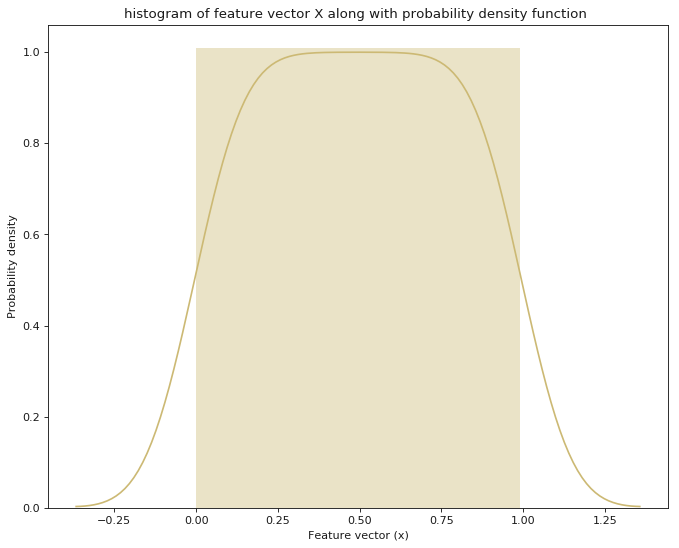

In [87]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# plot the histogram
sns.set_color_codes()
sns.distplot(X, color='y')
plt.title("histogram of feature vector X along with probability density function ")
plt.xlabel('Feature vector (x)')
plt.ylabel('Probability density')
plt.show()

### 3. Fit a Multi layer Perceptron Regressor

#### 3.1 Fit a simple MLP regressor without any parameters

In [ ]:
nn = MLPRegressor()

#### 3.2 Visualize the model

/Users/akhil/.pyenv/versions/jupyter/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


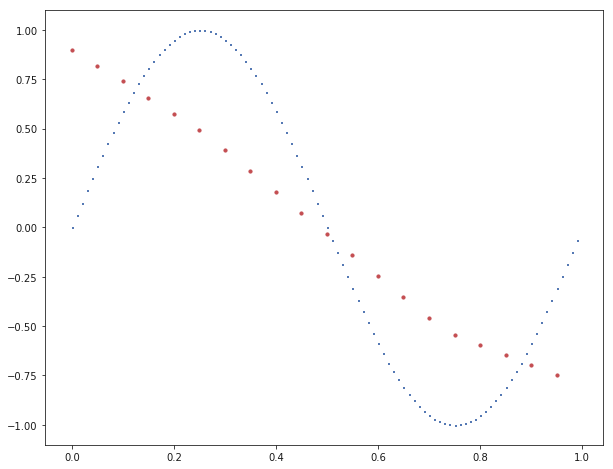

In [100]:
n = nn.fit(x, y)
test_x = np.arange(0.0, 1, 0.05).reshape(-1, 1)
test_y = nn.predict(test_x)
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x,test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.show()

#### 3.1 Fit a MLP regressor with parameters

In [ ]:
nn = MLPRegressor(
hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

#### 3.4 Visualize the new model

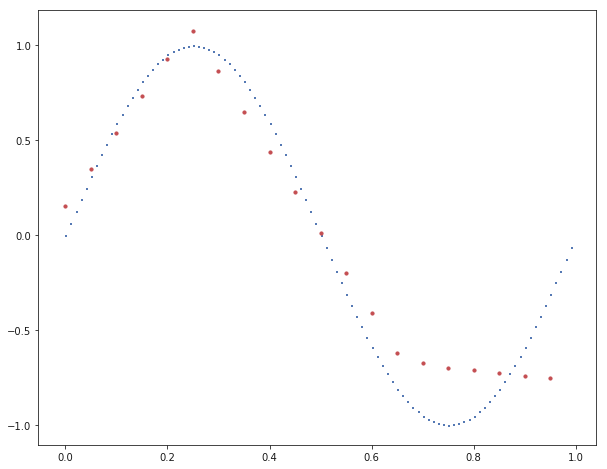

In [101]:
n = nn.fit(x, y)
test_x = np.arange(0.0, 1, 0.05).reshape(-1, 1)
test_y = nn.predict(test_x)
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x,test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.show()

### 4.Text Generation using LSTM

In [ ]:
path = get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('corpus length:', len(text))

chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y,
          batch_size=128,
          epochs=60,
callbacks=[print_callback])